# Lista 3 de Introdução á Física Atômica e Molecular

In [2]:
# Dependências

import scipy.constants as const
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
nota = {}

## Ex. 1

1.1a) A dependência parâmétrica em relação às coordenadas nucleares dos auto-estados significa que a função de onda depende das coordenadas no sentido de que se há funções de onda diferentes para diferentes coordenadas.

1.1b)

A hamiltoniana eletrônica é a hamiltoniana molecular sem o termo da energia cinética nuclear, portanto

$H_{mol} = T_n + T_e + V_{ee} + V_{en} + V_{nn}$, onde $T_n = \sum\frac{-\nabla^2_Q}{2 \mu}$, $T_e = \sum_i -\nabla^2_i$


A expansão de Born-Huang é dada por $\Psi(r_e, Q) = \sum X_k(Q) \psi(r_e|Q)$

1.1c)

1.2a) A aproximação adiabática Born-Oppenheimer consiste em desprezar a energia cinética nuclear no 

1.2b) A superfície de energia potencial BO são os termos diagonais da hamiltoniana eletrônica na aproximação de Born-Oppenheimer

1.2c)

In [57]:
nota["Ex1"] = [7, 0, 0, 2, 5, 0]

## Ex. 2

2a) (10/10)

A energia associada para um estado puramente rotacional $|j>$ ao supor rotações rígidas em moléculas diatômicas, é dado por $E_j = BJ(J+1)$ de modo que J é um inteiro positivo e onde B é o fator rotacional tal que $B=\frac{\hbar^2}{2I}$, com I sendo o momento de inércia da molécula. Portanto, as linhas para uma transição $J_i \rightarrow J_j$ são dadas por $\Delta E_{i\rightarrow j} = B[j(j+1) - i(i+1)]$. Nota-se que devido as regras de seleção, $j = i \pm 1$.

O momento de inércia I para um sistema diatômico é dado por $I=\mu R^2$, sendo assim, calcula-se explicitamente os valores de $E_j$ para as primeiras transições em J: $J_0 \rightarrow J_1$, $J_1 \rightarrow J_2$ , $J_2 \rightarrow J_3$ (o que se justifica devido as regras de seleção para o espectro rotacional).

In [4]:
R = 1.094e-10 # m - comprimento de ligação
m_mol = 14.00e-3 # kg/mol - massa molar
h = const.hbar # SI (mks)
c = const.speed_of_light # SI (mks)
N_a = const.Avogadro # SI (mks)
m = m_mol / N_a # kg
mu = (m ** 2) / (m + m) # kg
I = mu * (R ** 2) # kg*m²
B = (h ** 2) / (2 * I) # SI (mks)
E = lambda J: B  * J * (J + 1) # J
Delta_E = E(np.arange(0, 3)) - E(np.arange(1, 4)) # J
Lambda = h * c / Delta_E # m
for i, lamb in enumerate(Lambda):
    linha = np.abs(1 / (lamb)) * 1e-2 #cm⁻1
    print("Linha {}->{}: {:.3g} cm⁻¹".format(i, i + 1, linha))

Linha 0->1: 25.3 cm⁻¹
Linha 1->2: 50.6 cm⁻¹
Linha 2->3: 75.9 cm⁻¹


2b) (10/10)

Indica-se o uso da técnica Raman para a observação, dado que a molécula está inativa no IR devido ela ser homonuclear e diatômica, o que faz com que a molécula não possua momento de dipolo permanente. Consequentemente, não se há transição no momento de dipolo da mesma para diferentes estados - o que faz com que não se haja linhas espectrais associadas ao espectro rotacional puro.

In [5]:
nota["Ex2"] = [10, 10]

## Ex. 3

3a) (8/10)

Para se obter a distância interatômica da molécula de HI dada a informação da separação entre as linhas, começa-se por enunciar que a distância intermolecular é dada por (1), onde $\mu$ é a massa reduzida da molécula e $I$ é o momento de inércia. Tal expressão tem origem no uso do modelo de rotor rígido para uma molécula diatômica linear.

(1) $R = \sqrt{\frac{I}{\mu}}$

Ao mesmo tempo, sabe-se que a separação entre as linhas para transições sucessivas é dada por $\Delta E_{j+1} - \Delta E_{j} = 2B$ (2), onde B é a constante rotacional dada por $\frac{h^2}{2 I}$ (3).

Sendo assim, ao usar a informação de que a separação é dada por 12.8cm⁻¹, obtém-se a constante rotacional através de (2), o que por vez é usado para obter o momento de inércia através de (3). Por último, o momento de inércia é substituido em (1) para obter a distância intermolecular.

Ao fazer as substituições, notou-se uma divergência significativa com o resultado esperado de 1.61 Angstroms (o resultado deu 4.09 Angstroms)

In [3]:
h = const.hbar # SI (mks)
c = const.speed_of_light # SI (mks)
N_a = const.Avogadro # SI (mks)

linha = 12.8 * 1e2 # m⁻¹
m_mol_1 = 1e-3 # kg/mol - massa molar do ¹H
m_mol_2 = 127e-3 # kg/mol - massa molar do ¹²⁷I

m1 = m_mol_1 / N_a # kg
m2 = m_mol_2 / N_a # kg
mu = (m1 * m2) / (m1 + m2) # massa reduzida - (kg)

linha = linha * h * c # conversão para energia (J)
B = linha / 2 # Constante rotacional (J)
I = (h ** 2) / (2 * B) # Momento de inércia (kg*m²)
R = np.sqrt(I / mu) # (m)
print("Distância internuclear: {:.3f} Angstroms".format(R * 1e10))

Distância internuclear: 4.084 Angstroms


3b) (9/10) Assumindo-se que a a distância interatômica permanece constante, o que é intuitivo dado que o atômo de Iodo é muito maior do que o do deutério, utiliza-se o resultado anterior de modo analogo com o Exercício 2 para calcular a separação. Nota-se que o valor da separação entre as linhas é a metade para a molécula HI, o que está compatível com o previsto na literatura (https://ac.els-cdn.com/0022285257900218/1-s2.0-0022285257900218-main.pdf?_tid=cbced13b-4f71-4891-871e-fab412180f0c&acdnat=1528815595_c9cc1e68b9d5cf534b1f11b780a5428a)

In [7]:
m_mol_1 = 2e-3 # kg/mol - massa molar do ¹H
m_mol_2 = 127e-3 # kg/mol - massa molar do ¹²⁷I
m1 = m_mol_1 / N_a # kg
m2 = m_mol_2 / N_a # kg
mu = (m1 * m2) / (m1 + m2) # k
I = mu * (R ** 2) # kg*m²

B = (h ** 2) / (2 * I) # SI (mks)
Delta_E = 2 * B # J
linha = Delta_E / (h * c) # m⁻¹
print("{:.3g} cm⁻¹".format(linha * 1e-2))

6.45 cm⁻¹


In [8]:
nota["Ex3"] = [8, 9]

## Ex. 4


4) (8.5/10)

No modelo de potencial de Morse, os autoestados possuem autovalores dados por $E_v = \hbar \omega_0 (\nu + \frac{1}{2})(1 - x_e(\nu + \frac{1}{2}))$.

Para se obter o valor máximo de $v$, uma forma é fazendo a imposição de que $E_{v+1} - E_{v} = 0$. Tal procedimento é válido dado que o potencial de Morse é monotônico nos ramos a partir da distância de separação internuclear.

Sendo assim, faz-se a substituição $a = v + \frac{1}{2}$ e teremos que:

(1) $E_{v+1} - E_{v} = \hbar \omega_0 (a+1) (1 - x (a + 1)) - \hbar \omega_0 a (1 - x a) = 0$

(2) $a(1 - xa) = a(1 - xa) - xa + (1 - x(a + 1)$

(3) $2ax = 1  x$

(4) $a = \frac{1-x}{2x}$

(5) $v = \frac{1-x}{2x} - \frac{1}{2} = \frac{1 - 2x}{2x}$

Sendo assim, $v_{max} =  \frac{1 - 2x}{2x}$, conforme esperado ao inspecionar o artigo do wikipedia

In [9]:
nota["Ex4"] = [8.5]

## Ex. 5

5a) A temperatura faz com que haja populações de moléculas em estados rotacionais distintos, causando o surgimento de bandas espectrais. Em específico, quanto maior a temperatura, maior será a população em estados vibracionais mais elevados, fazendo com que a distribuição seja mais dispersa.

5b) Utilizando-se da função de repartição, faz-se um gráfico da distribuição de probabilidade do HI para 300K. Nota-se que o estado com máxima probabilidade é de J=10

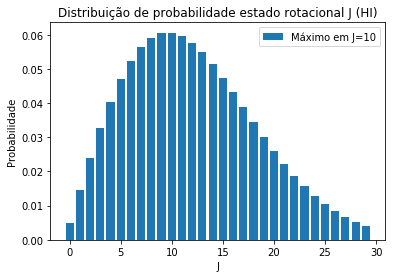

In [64]:
h = const.hbar # SI (mks)
c = const.speed_of_light # SI (mks)
N_a = const.Avogadro # SI (mks)
k_b = const.Boltzmann # SI (mks)

J = np.arange(0, 30)

linha = 12.8 # cm⁻¹
Lambda = 1e-2 / linha # m
m_mol_1 = 1e-3 # kg/mol - massa molar do ¹H
m_mol_2 = 127e-3 # kg/mol - massa molar do ¹²⁷I
T = 300 # K

m1 = m_mol_1 / N_a # kg
m2 = m_mol_2 / N_a # kg
mu = (m1 * m2) / (m1 + m2) # kg

beta = 1 / (k_b * T)
Delta_E = (h * c) / Lambda # J
B = Delta_E / 2 # J
n = (2 * J + 1) * np.exp(-beta * B * J * (J + 1))
Z = np.sum(n)
P = n / Z
plt.bar(J, P, label="Máximo em J={}".format(np.argmax(n)))
plt.title("Distribuição de probabilidade estado rotacional J (HI)")
plt.xlabel("J")
plt.ylabel("Probabilidade")
plt.legend()
plt.show()

5c) (7/10) Espera-se que o efeito térmico seja mais importante para o espectro rotacional, pois as populações de estados menos energéticos são mais suscetíveis a variações na temperatura ao mesmo tempo que as transições rotacionais possui uma escala de energia menor que as vibracionais. Portanto, a intensidade relacionada com uma transição puramente rotacional é mais afetada pela temperatura do que por uma transição vibracional

In [65]:
nota["Ex5"] = [10, 6, 9]

## Ex. 6

6a) Pela largura da separação entre as linhas, a constante B possui valor aproximado de $B=6cm⁻¹ $, dado que cada separação possui largura de 2B devido as regras de seleção pela diferença das energia de transição rotacionais. A distância de equilíbrio é obtida fazendo procedimento análogo ao exercício 3. Nota-se que o resultado obtido está relativamente proximo do valor previsto pela literatura de 1.21 Angstroms

In [4]:
h = const.hbar # SI (mks)
c = const.speed_of_light # SI (mks)
N_a = const.Avogadro # SI (mks)

m_mol = 16e-3 # kg/mol - massa molar do Oxigênio
B_linha = 6 # cm⁻¹
B = (h * c) * (B_linha) * 1e2

m1 = m_mol / N_a # kg
m2 = m_mol / N_a # kg
mu = (m1 * m2) / (m1 + m2) # kg

I = (h ** 2) / (4 * B) # kg*m²
R = np.sqrt(I / mu) # m
print("Distância internuclear: {:.3g} Angstroms".format(R * 1e10))

Distância internuclear: 1.05 Angstroms


6b) A linha correspondente a frequência fundamental, que está associada ao espalhamento Rayleigh, possui valor de  cerca de 1550cm⁻¹. Portanto o valor de $\hbar \omega_0$ é de :

In [13]:
linha = 1550 * 1e2 # m⁻¹
energia = linha * h * c
print("Energia: {:.3g} eV".format(energia / const.eV))
print("Frequência: {:.3g} Hz".format(energia / c))

Energia: 0.0306 eV
Frequência: 1.63e-29 Hz


In [40]:
nota["Ex6"] = [9, 10]

## Ex. 7

7a) (9/10) Na espectroscopia IR, as linhas estão associadas a transições rovibracionais determinadas pelo momento de dipolo permanente da molécula, enquanto que na espectroscopia Raman mensuras-se o espalhamento de fótons com frequências diferentes da de Rayleigh determinadas pelo momento de dipolo induzido, o qual está associado com uma polarizabilidade anisotrôpica da molécula.

7b) (9/10) A bandas Q se referem para as linhas da transições rovibracionais onde o número de estado rotacional não se altera, enquanto que as bandas P e Q se referem para quando o número de estado rotacional é somado ou subtraido respectivamente. 

Não se observa a banda Q para moléculas diatômicas devido as regras de seleção em uma molécula dipolar, que impoẽ que toda transição rovibracional deve ser seguida de somar ou subtrair o número rotacional por um. Isso implica na impossibilidade de existir uma transição puramente vibracional pura em moléculas diatômicas

7c) (10/10) As bandas Stokes são as linhas de absorção que apresentam frequência menor do que a frequência da banda Rayleigh, enquanto que as Anti-Stokes apresentam uma frequência maior.

7d) (7/10) o espalhamento Rayleigh faz com que o fóton espalhado possua a frequência do fóton incidente, enquanto que no Raman há frequências diferentes para o fóton espalhado devido a polarizabilidade anisotrôpica da molécula, caso haja.

7e) (3/10) Como os fótons emitidos pelo processo Raman Anti-Stokes possuem frequência maiores e portanto energias maiores em relação ao Stokes, então a probabilidade ao considerar a distribuição de Boltzmann ($P \propto e^{\frac{-aE}{k_b T}}$) faz com que os fótons Anti-Stokes possuem incidência menor que os de Stokes.

O aumento da temperatura faz o fator energia perder importância em probabilidade e portanto favorece o estudo da banda Anti-Stokes

In [71]:
nota["Ex7"] = [9, 9, 10, 7, 3]

## Ex. 8

8a) (8/10) 

Atividade IR é o espectro de linhas emitidas/absorvidas por transições rovibracionais oriundas do momento de dipolo permanente de uma molécula.

Atividade Raman é o espectro de linhas espalhadas das transições rovibracionais devido ao efeito Raman, o qual gera um momento de dipolo induzido na molécula.

O efeito Raman no espalhamento de fótons com frequência diferente em relação aos emitidos inicialmente. Isso acontece devido ao momento de dipolo induzido em uma molécula devido a existência de uma polarizabilidade anisotrôpica.

8b) Para um modo vibracional apresentar atividade IR, o momento de dipolo da molécula deve se alterar para as transições até outro modo vibracional. Isto é, o momento de dipolo não deve ser nulo na posição de equilíbrio.

Já para atividade Raman, é necessário que a molécula possua polarizabilidade anisotrôpica para que o momento de dipolo induzido seja variado para as transições entre os diferentes modos vibracionais

8c) Não se espera observar atividade IR em moleculas diatômicas homonucleares, dado que elas não tem  dipolo permanente e portanto o momento de dipolo será nulo para as transições vibracionais, o que faz com que a probabilidade de transição seja nula.

Com espectroscopia Raman, a simetria linear de uma molécula diatômica faz com que quase certamente seja possível observar os níveis rovibracionais da mesma, porém sujeito a polarizabilidade específica da molécula.

8d) 

Espera-se que se pode observar ambos, dado que uma molécula heteronuclear diatômica irá possuir dipolo permanente e portanto será passível de observada com espectroscopia IR.

Pelo mesmo argumento do item anterior, também se coloca a molécula como observável por Raman

In [36]:
nota["Ex8"] = [8, 7, 7, 7]

## Ex. 9

9a) A população de $Cl^{35}_2$ deve ser maior, pois ela possui um momento de inércia menor, o que faz com que as transições de energia também possuam magnitude menor. Consequentemente, há uma tendência maior de que haja uma concentração populacional delas mais próximo ao estado fundamental em relação para com as outras.

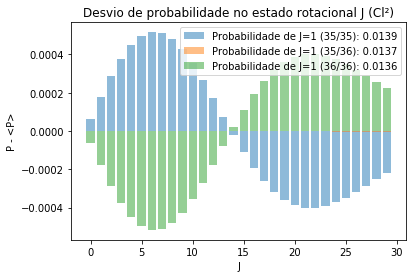

In [50]:
h = const.hbar # SI (mks)
c = const.speed_of_light # SI (mks)
N_a = const.Avogadro # SI (mks)
k_b = const.Boltzmann # SI (mks)

J = np.arange(0, 30)
T = 300 # K
R = 1e-10


def get_P(Z1, Z2):
    m1 = Z1 * 1e-3 / N_a # kg
    m2 = Z2 * 1e-3 / N_a # kg
    mu = (m1 * m2) / (m1 + m2) # kg
    beta = 1 / (k_b * T)
    I = mu * (R ** 2)
    B = (h ** 2) / (2 * I)
    n = (2 * J + 1) * np.exp(-beta * B * J * (J + 1))
    Z = np.sum(n)
    return (n / Z)

P1 = get_P(35, 35)
P2 = get_P(35, 36)
P3 = get_P(36, 36)

p = (P1 + P2 + P3) / 3
#p = 0

plt.bar(J, P1 - p, alpha=0.5,
        label="Probabilidade de J=1 (35/35): {:.3g}".format(P1[1]))
plt.bar(J, P2 - p, alpha=0.5,
        label="Probabilidade de J=1 (35/36): {:.3g}".format(P2[1]))
plt.bar(J, P3 - p, alpha=0.5,
        label="Probabilidade de J=1 (36/36): {:.3g}".format(P3[1]))
plt.title("Desvio de probabilidade no estado rotacional J (Cl²)")
plt.xlabel("J")
plt.ylabel("P - <P>")
plt.legend()
plt.show()

9b) AS moléculas $Cl^{35}_2$ e $Cl^{37}_2$ devem ser estudas por espectroscopia Raman devido a serem homonucleares, resultando na impossibilidade de estudar através de espectroscopia IR.

Já a molécula $Cl^{35} Cl^{37}$ por ser heteronuclear acaba por ser propícia ao estudo tanto por espectroscopia IR quanto Raman

In [51]:
nota["Ex9"] = [4, 10]

## Ex. 10

10)

Na molécula de CO, há um modo ativo IR entre o Carbono e o Oxigênio dado que é uma molecular linear e polar.

Na molécula de dinitrogênio, não há modos ativos devido a se tratar de uma molécula linear apolar.

Na molécula (c), há um modo ativo na ligação CO.

Na molécula (d), há um modo ativo envolvendo o átomo de Fluor.

Na molécula (e), não há dipolo permanente e portanto não há modos ativos.

Na molécula (f) há uma assimetria e portanto há um dipolo permanente. Logo, há um modo ativo 

In [59]:
nota["Ex10"] = [9, 9, 9, 7, 7, 7]

## Ex. 11

Nessa simulação, procede-se do seguinte modo:

* Calcula-se as energias vibracionais para alguns estados utilizando-se de $\omega_0 = 2150cm⁻¹$
* Calcula-se as energias de transição vibracionais para estados consecutivos
* Para cada energia de transição, calcula-se as energias de transição rotacionais de acordo com as regras de seleção.
* As energias calculadas são usadas então para calcular as populações de acordo com a distribuição de Boltzmann

11a) (7.5/10)

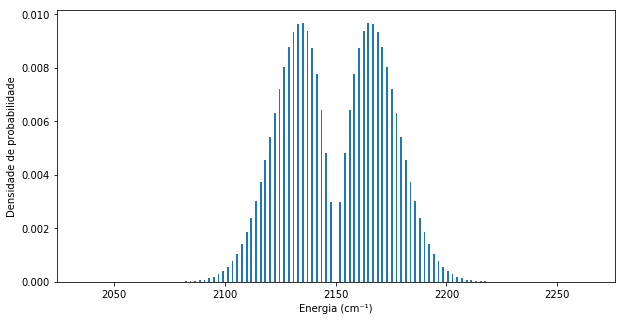

In [20]:
def get_Ev(v, omega_0):
    """
    Calcular a diferença de energia para o próximo
    estado vibracional.
    """
    _E1 = h* omega_0 * (v + 1 / 2)
    
    _E2 = h * omega_0 * (v + 3 / 2)
    
    _E = _E2 - _E1
    return np.array(_E)

def get_Pj(Ev, J, B, beta):
    """
    Calcular a probabilidade ponderada dos estados rotacionais.
    """
    Pj = []
    for j in J:
        p = (2 * j + 1)
        p *= np.exp(-B * j * (j + 1) * beta)
        Pj.append([j, p])
        if (j != 0):
            Pj.append([-j, p])
    Pj = np.array(Pj)
    Pj[:, 0] *= 2 * B
    Pj[:, 0] += Ev
    return Pj

v = np.arange(0, 4) # Números vibracionais
J = np.arange(1, 55) # Números rotacionais
m_1 = 10 * 1e-3 / N_a # kg (Oxigenio)
m_2 = 8 * 1e-3 / N_a # kg (Carbono)
mu = (m1 * m2) / (m1 + m2) # kg
omega_0 = 2150 * c * 1e3 # m⁻¹

R = 1.12e-10 # m [obtido do wikipedia]
T = 300 # K


I = mu * (R ** 2) # kg*m²
B = (h ** 2) / (2 * I) # SI (mks)

beta = 1 / (const.Boltzmann * T)

Ev = get_Ev(v, omega_0)
Pj = [get_Pj(ev, J, B, beta) for ev in Ev]
Pj = [item for pj in Pj for item in pj]
Pj = np.array(Pj)
Z = np.sum(Pj[:, 1])
Pj[:, 1] = Pj[:, 1] / Z
Pj = Pj.T
inds = np.argsort(Pj[0])
Pj = Pj[:, inds]

plt.figure(figsize=(10, 5))
plt.bar(Pj[0] / (h * c * 1e3), Pj[1])
plt.ylabel("Densidade de probabilidade")
plt.xlabel("Energia (cm⁻¹)")
plt.show()

11b) (7/10)

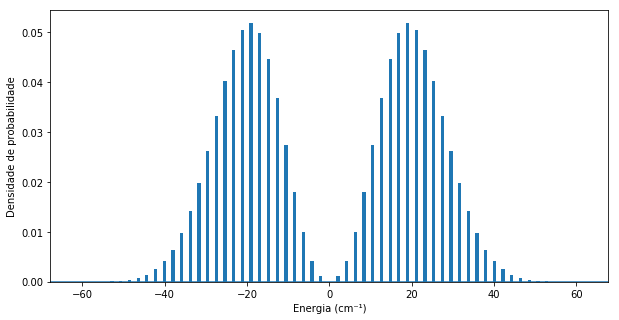

In [21]:
def get_Pj(Ev, J, B, beta, dipolo):
    """
    Calcular a probabilidade ponderada dos estados rotacionais.
    """
    Pj = []
    for j in J:
        p = (2 * j + 1)
        p *= np.exp(-B * j * (j + 1) * beta)
        p *= (dipolo ** 2) * (j + 1) * (2 * j + 1)
        Pj.append([j, p])
        if (j != 0):
            Pj.append([-j, p])
    Pj = np.array(Pj)
    Pj[:, 0] *= 2 * B
    Pj[:, 0] += Ev
    return Pj

v = np.arange(0, 1) # Números vibracionais
J = np.arange(1, 30) # Números rotacionais
m_1 = 10 * 1e-3 / N_a # kg (Oxigenio)
m_2 = 8 * 1e-3 / N_a # kg (Carbono)
omega_0 = 2150 * c * 1e3 # m⁻¹
mu = (m1 * m2) / (m1 + m2) # kg

R = 1.12e-10 # m [obtido do wikipedia]
T = 150 # K
dipolo = 0.122 / c # C*m
omega_0 = 4 * 1e2 # m⁻¹

I = mu * (R ** 2) # kg*m²
B = (h ** 2) / (2 * I) # SI (mks)

beta = 1 / (const.Boltzmann * T)

Ev = get_Ev(v, omega_0)
Pj = [get_Pj(ev, J, B, beta, dipolo) for ev in Ev]
Pj =[item for pj in Pj for item in pj]
Pj = np.array(Pj)
Z = np.sum(Pj[:, 1])
Pj[:, 1] = Pj[:, 1] / Z
Pj = Pj.T
inds = np.argsort(Pj[0])
Pj = Pj[:, inds]

plt.figure(figsize=(10, 5))
plt.bar(Pj[0] / (h * c * 1e3), Pj[1])
plt.ylabel("Densidade de probabilidade")
plt.xlabel("Energia (cm⁻¹)")
plt.axhline(0)
plt.show()

In [22]:
nota["Ex11"] = [7.5, 7]

## Ex. 12

12a) Transição vibrônica consiste uma transição que envolve tanto o estado eletrônico quanto o vibracional. Tal classe de transição costuma ser tratada negligenciado o termo rotacional e translacional na aproximação de Born-Oppenheimer

12b) As integrais, ou overlaps, de Franck-Condon são os produtos escalares entre auto-estados vibracionais de diferentes curvas de potencial (isto é, $<\nu_k | \nu_{k'} >$). Já os fatores de Frank-Condon são os respectivos módulos ao quadrado do produto escalar.

12c) O principio de Frank-Condon afirma que as transições entre os estados eletrônicos da molécula são verticais, isto é: não envolvem movimento apreciável dos núcleos. Em outras palavras, a coordenada vibracional não é alterada em uma transição entre estados eletrônicos.

Expressando de modo quantitativo, a energia da transição de um estado eletrônico é dada pela diferença entre o potencial do estado final e inicial, ambos calculados na coordenada vibracional de equilíbrio do estado inicial.

12d) Dada uma transição $(\psi_0, \mu_0)\rightarrow(\psi_1, \mu_1)$, queremos saber o valor de (1). Ao usar o fato de que $|<v_0|v_1>|^2 = <v_0|v_1><v_1|v_0>$, teremos que (1) pode ser expresso por (2). 

(1) $\sum^{8}_{v_1=0} |<v_0|v_1>|^2$

(2) $<v_0| (\sum^{8}_{v_1=0} <v_1|v_1>) |v_0>$


Como as diferentes autofunções $|v_1>$ são ortogonais entre si, então podemos usar a identidade $\sum|n><n| = 1$. Portanto, teremos que $\sum^{8}_{v_1=0} |<v_0|v_1>|^2 = <v_0|v_0> = 1$

In [53]:
nota["Ex12"] = [8, 8, 8, 7]

## Ex. 13

13) No problema, pede-se para obter o fator de Franck-Cordon entre os estados vibracionais $v_0 = v_1 = 0$ associados com as curvas de potencial $V_0$ (associado ao estado fundamental $\psi_0$) e $V_1$  (associado ao estado $\psi_1$) para uma molécula diatômica.

É dada as informações de que a energia do mínimo de $V_1$ é maior do que o mínimo de $V_0$ em $\epsilon$ e de que a separação no mínimo em $V_1$ é maior do que em $V_0$ por uma quantidade $\Delta Q_0$. Por último, é enunciado que a frequência harmônica associada ao potencial $V_1$ é igual ao do estado fundamental, isto é, $\omega_1 = \omega_0$.

Sendo assim, começamos por enunciar a definição do fator de Frank-Cordon: ele é o módulo da integral de Franck-Cordon para dados estados vibracionais $i$ e $j$. Logo, o fato se expressa por $|<v_i|v_j>|^2$

Portanto, inicia-se a resolução abrindo a integral de Franck-Cordon, indicado pela expressão (1):

(1) $<v_0|v_1> = \int |v_0>^* |v_1>$

Os estados vibracionais para um potencial harmônico são dados pelas autofunções do oscilador harmônico. Portanto, a autofunção associada a $v_0$ é indicada na expressão (2.a) enquanto a associada a $v_1$ está indicada na expressào (2.b), nos quais se foram feitas a substituição $\alpha=aaa$ em ambos os casos.

(2.a)

(2.b)

Sendo assim, substitui-se as expressões de (2) em (1) e delimita-se o domínio de integração em $x=[0, \infty]$, o que resultará na expressão (3). Ao utilizar o valor tabelado de uma integral gaussiana dada por (4), teremos que o a integral de Franck-Cordon é de (5), e ao aplicar o módulo e quadrado no mesmo, teremos o Fator de Franck-Cordon, indicado pela (6).

(3) aaa

(4) aaa

(5) aaa

(6) aaa

Como comentário, nota-se que o fator não é nulo, o que é indicativo da não-ortogonalidade entre os estados vibracionais.


In [31]:
nota["Ex13"] = [3]

## Ex. 14

14) Na figura contida nos slides, nota-se que o espectro UV do CO apresenta um espaçamento entre os picos de aproximadamente 1.45kK = 1450cm⁻¹ e o pico inicial está localizado em 64700cm⁻¹. 

A frequência harmônica é aproximadamente igual a separação entre os picos.

A constante de anarmocidade é obtida pela expressão (1), (2) e (3), os quais associam a diferença de energia da transição vibracional $\nu_{0\rightarrow9}$ com a anarmonicidade.


(1) $E_v = \hbar \omega_0 [(\nu + \frac{1}{2}) - x_e(\nu + \frac{1}{2})^2]$

(2) $\Delta E_{0 \rightarrow 1} = \hbar \omega_0 [(\frac{3}{2} - \frac{9x_e}{4} - (\frac{1}{2} - \frac{x_e}{4}))] = \hbar \omega_0 (1 - 2x_e)$

(3) $x_e = \frac{1}{2}(1 - \frac{\Delta E}{\hbar \omega_0})$


In [25]:
delta_linha = 1516 * 1e2 # m⁻¹
linha_0 = 64703 * 1e2 # m⁻¹
x_e = 2 * (1 - 4 * delta_linha / linha_0)

print("Frequência harmônica: {:.5g} cm⁻¹".format(delta_linha * 1e-2))
print("Constante de anarmocidade: {:.5g} ".format(x_e))

Frequência harmônica: 1516 cm⁻¹
Constante de anarmocidade: 1.8126 


In [26]:
nota["Ex14"] = [6]

## Ex. 15

15a)

A força restauratadora da molécula é equilibrada pela força centrífuga, o que na resulta na expressão (1). Ao considerar o momento angular como sendo dado pela expressão (2) (considerando o momento de inércia como sendo de uma partícula), faz-se a substituição (3) em (1) na qual resulta na expressão (4), conforme esperado.

(1) $F_{centrífuga} = F_{restauradora} \leftrightarrow -k(r_c - r_e) = \mu \omega^2 r_c$

(2) $L = I \omega = \mu \omega r_c^2$

(3) $\mu \omega^2 r_c = \frac{L^2}{\mu r_c^3}$

(4) $r_c^3 (r_c - r_e) = \frac{L^2}{k \mu}$

15b) (0/10)

Ao assumir a expressão (1), onde $E=E_{rot}$, busca-se representar o resultado do exercício anterior eliminando-se o parâmetro $r_c$. Para tal, enuncia-se a expressão (1') e substitui-se na expressão (4) do bloco anterior, resultando em (2). Ao isolar $E$, tem-se a expressão (3)

(1) $E=\frac{L^2}{2 \mu r_c^2} \leftrightarrow r_c = \sqrt{\frac{L^2}{2 \mu E}}$ (1')

(2) $\sqrt{\frac{L^2}{2 \mu E}}^3 (\sqrt{\frac{L^2}{2 \mu E}} - r_e) = \frac{L^2}{k \mu} \equiv$

15c) (-3/10)

In [29]:
nota["Ex15"] = [8, 0, 0]

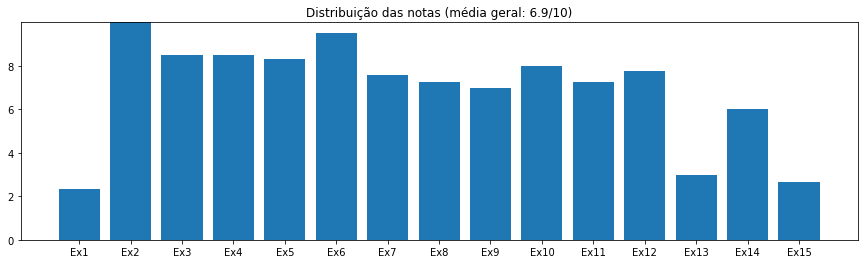

In [72]:
nota_geral = 0
nota_parcial = []

for n in nota.keys():
    parcial = np.mean(nota[n])
    nota_parcial.append(parcial)
    nota_geral += parcial / 15

plt.figure(figsize=(15, 4))
plt.title("Distribuição das notas (média geral: {:.1f}/10)".format(nota_geral))
plt.yticks(np.arange(0, 10, 2))
plt.ylim((0, 10))
plt.bar(nota.keys(), nota_parcial)
plt.show()